#### Allowed packages: Pandas, matplotlib, seaborn, and numpy. Sklearn is allowed only for getting the dataset.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from helper import *
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size':18})

# some data processing and feature analysis

<li> load boston house dataset </li>
<li> split train and test with ratio 1 to 3 </li>
<li> plot the target value based on 13 different features and recognize the correlation between features and
the target values. talk about them and their meanings.</li>

In [41]:
data,X,y = get_data_normalized()
X_train, X_test, y_train, y_test = split_data(X,y,0.25)

In [82]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
105,-0.404684,-0.487240,-0.375604,-0.272329,-0.299411,-0.617170,0.999156,-0.801698,-0.522484,-0.143809,1.129112,0.409398,0.534506
332,-0.416072,1.013460,-0.740017,-0.272329,-1.007917,-0.360985,-1.608410,1.351400,-0.981871,-0.618482,-0.718509,0.061076,-0.675399
410,5.524853,-0.487240,1.014995,-0.272329,0.365083,-0.750956,1.116390,-1.131230,1.659603,1.529413,0.805778,-3.878357,-0.356118
160,-0.272052,-0.487240,1.230727,3.664771,0.434121,-0.049293,0.853502,-0.948204,-0.522484,-0.031074,-1.734701,-0.194469,-1.001681
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,-0.412976,0.370303,-1.137956,3.664771,-0.964768,1.936141,-0.670539,0.672864,-0.522484,-1.140622,-1.642320,0.223408,-1.350368
13,-0.346887,-0.487240,-0.436826,-0.272329,-0.144075,-0.477692,-0.240681,0.433325,-0.637331,-0.600682,1.175303,0.440616,-0.615184
139,-0.356797,-0.487240,1.567444,-0.272329,0.598087,-0.190195,1.041786,-1.009798,-0.637331,0.170662,1.267684,0.440616,0.813176
366,0.009699,-0.487240,1.014995,-0.272329,1.409287,-1.881016,0.810871,-0.970097,1.659603,1.529413,0.805778,-0.445195,0.188619


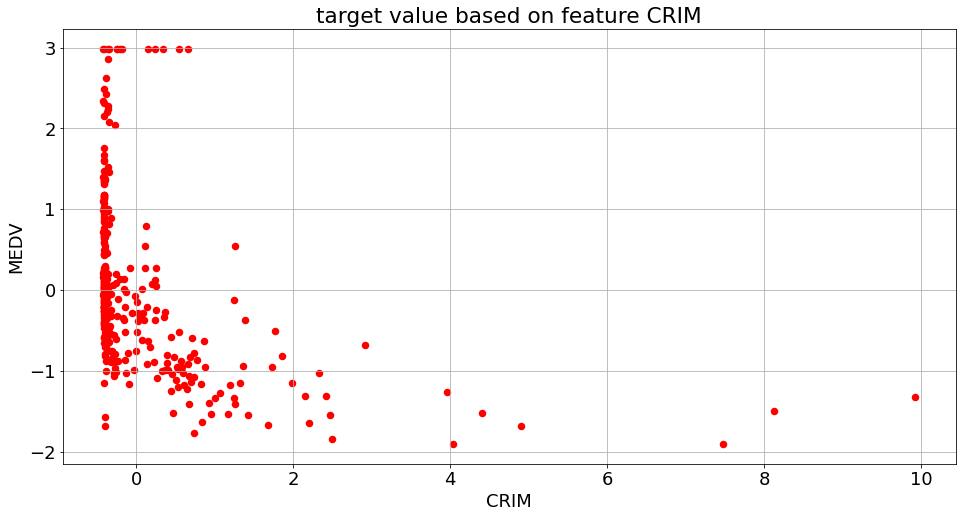

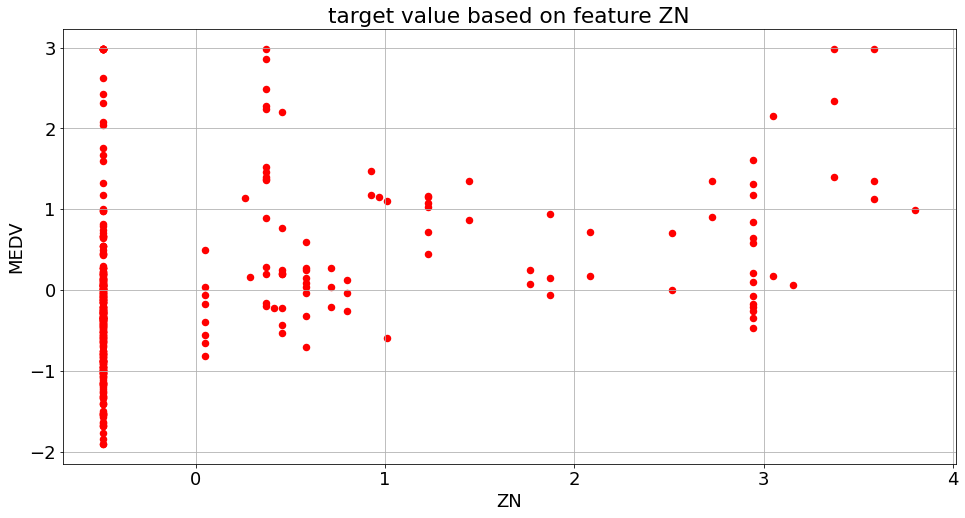

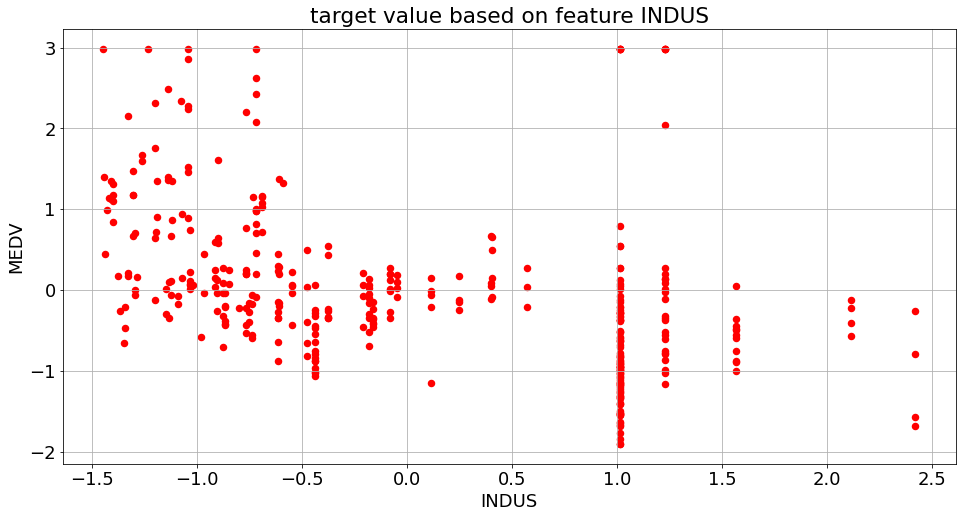

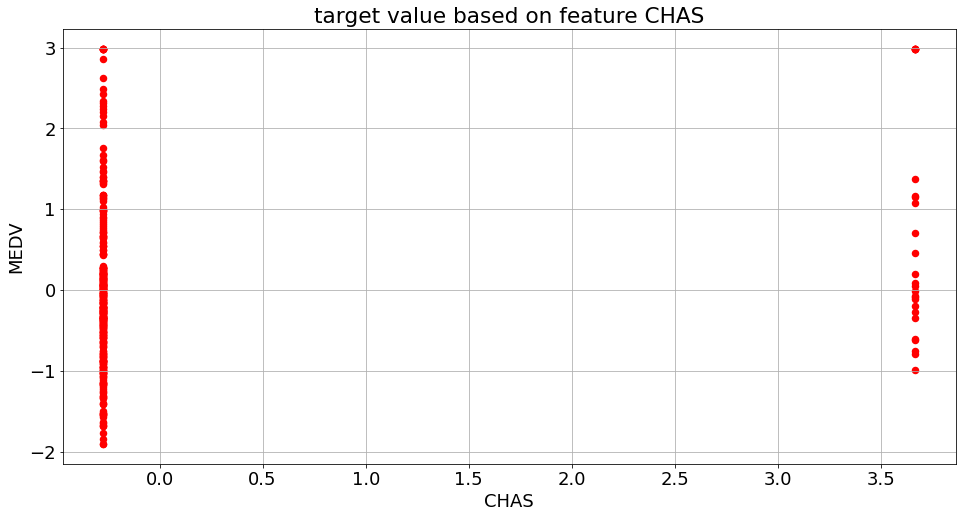

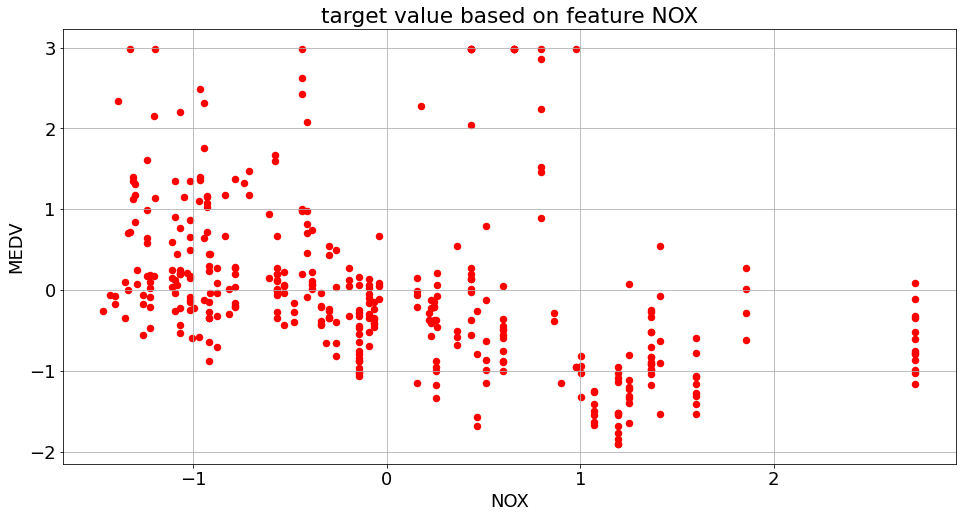

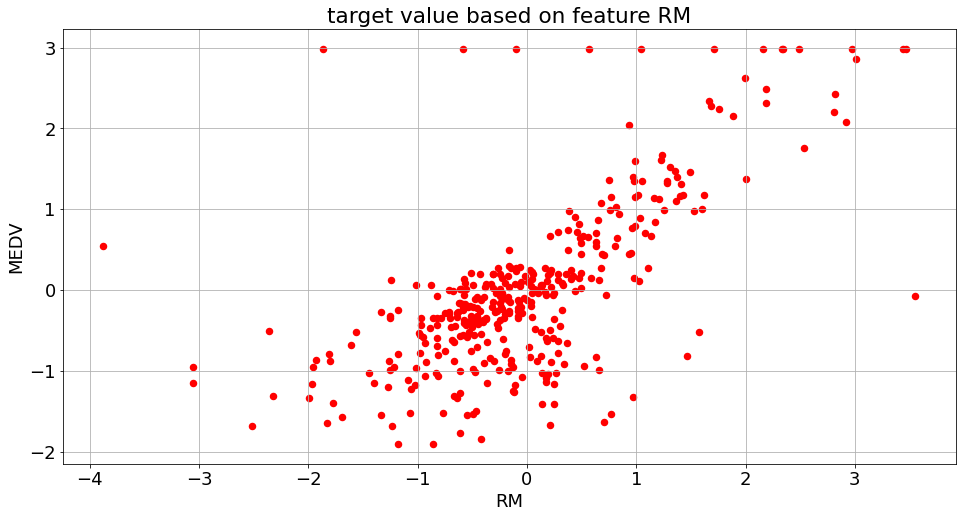

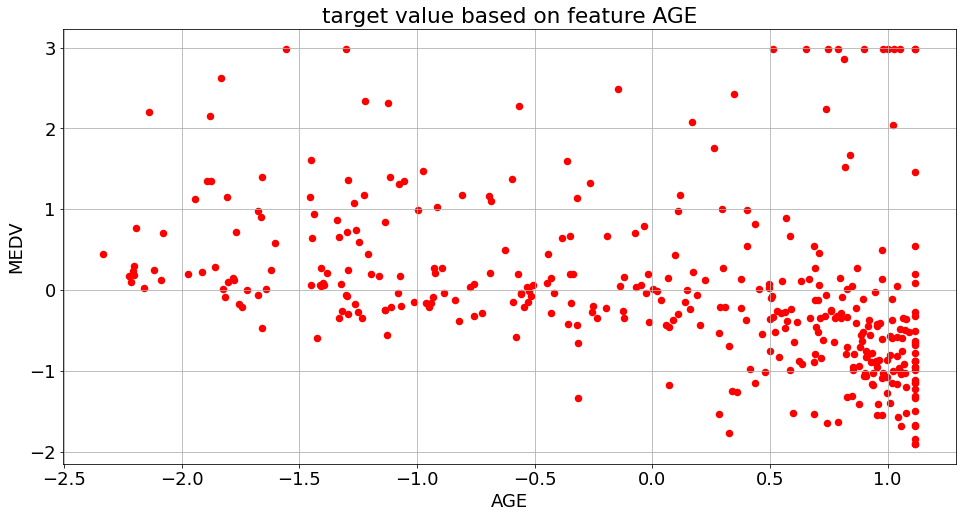

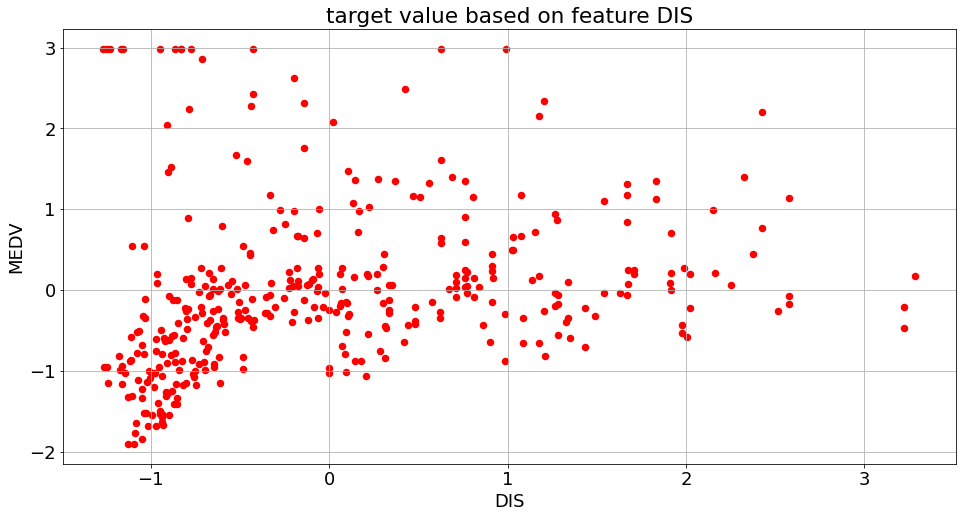

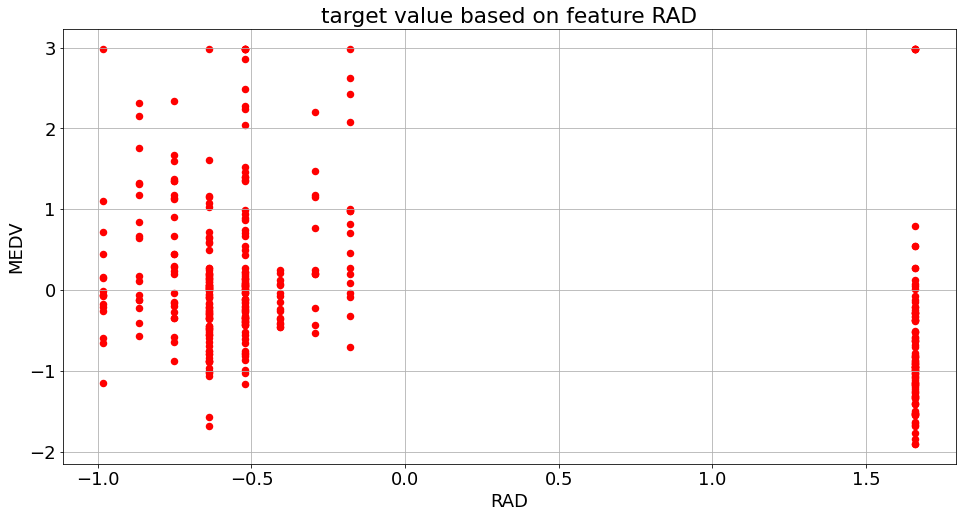

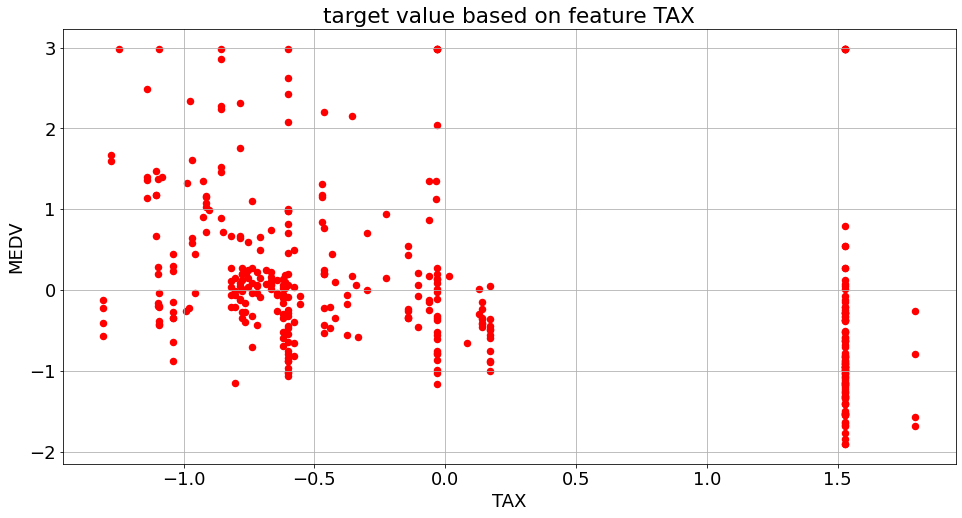

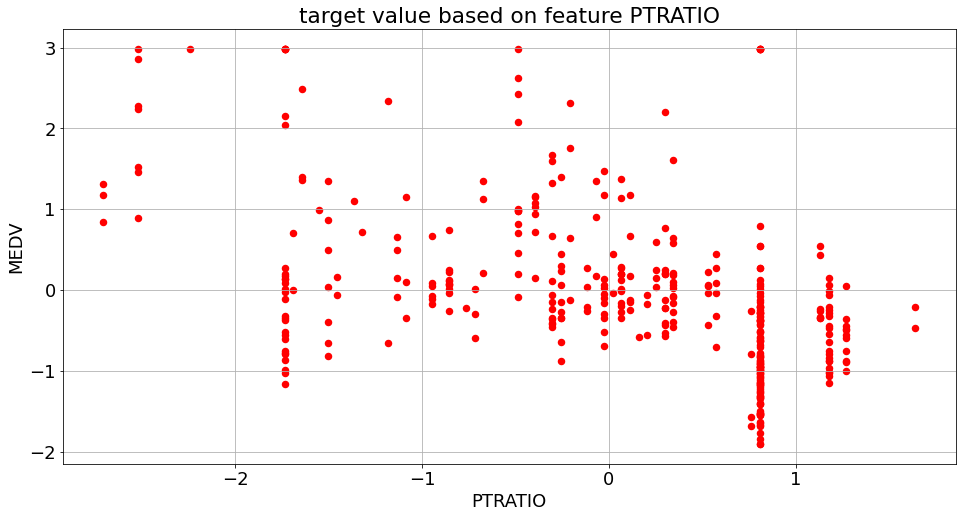

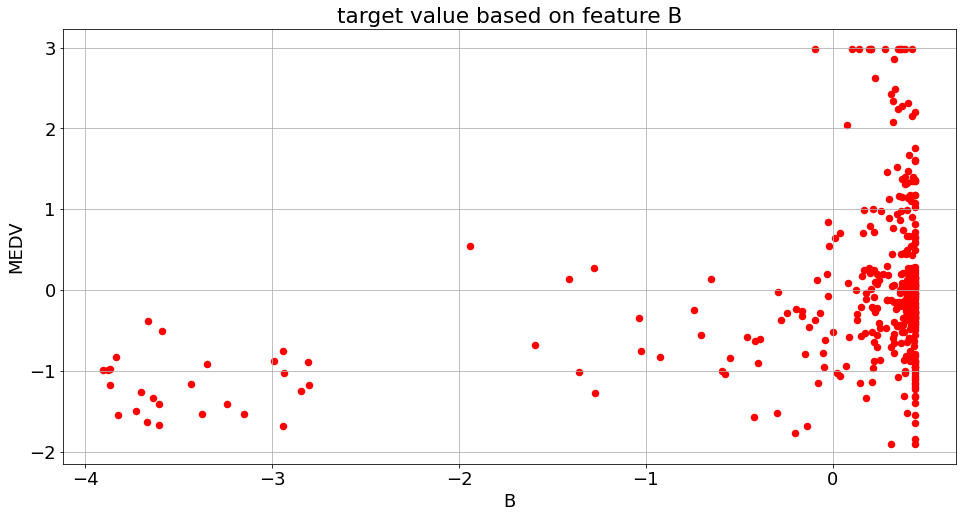

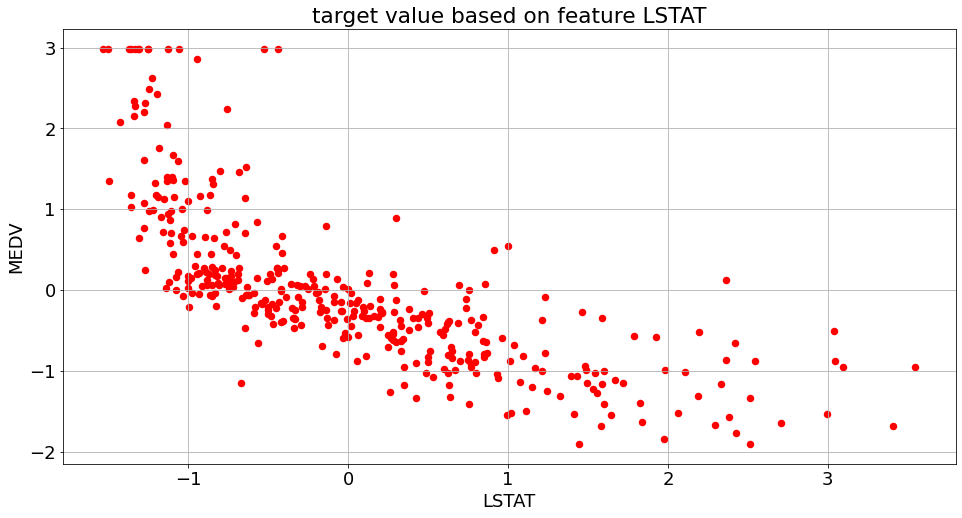

In [43]:
for col in X_train.columns:
    xs, ys = zip(*sorted(zip(list(X_train.get(col)), list(y_train))))
    plt.figure
    plt.scatter(xs, ys, color='red', lw=1.5)
    plt.ylabel(data.columns[-1])
    plt.xlabel(col)
    plt.title(f'target value based on feature {col}')
    plt.grid()
    plt.show()

### Correlation between features and target:
#ToDo

## close form of Linear Regression
Minimize 
$$
\frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$
<li> 1-write down close form of linear regression </li>
<li> 2-now use this close form to obtain good weight for this problem </li>
<li> 3-Plot the target value and the predicted value based on ‘LSTAT’, ‘DIS’, and any other
features so that you can see how the distributions vary</li>
<li> 4-plot regularization - weights_norm with lambda between 0 to 0.1 with step 0.005 </li>
<li> 5-plot regularization - test_error with lambda between 0 to 0.1 with step 0.005 </li>
<li> 6-explain effect of regularization </li>
<li> 7-add square of each feature to data set and repeat 4,5,6</li>
<li> 8-add square and power of three of each feature to data set and repeat 4,5,6</li>
<li> compare part $7^{th}$ test error and previous one <b>explain how 7 and 8 are helping model to do better work </li>
    
$$
W = (\phi ^T\phi +\lambda I)^{-1}\phi ^Ty
$$

In [69]:
#this is just template you are free to implement is however you want. add many cell as you wish
class LinearRegressionModel: #phi is phi = lambda X : np.c_[np.ones(X.shape[0]),X] for adding bias term to data or 
    # any other features to data (this is just suggestion you are free to do whatever you want.)
    def __init__(self):
        self.phi = lambda X : np.c_[np.ones((X.shape[0],1)),X]
        self.W = 0
    

    def fit(self,X,y,regularization:float):
        """
        get X and y train and learn the parameter by the equation.
    
        """
        phi = self.phi(X)
        self.W = np.linalg.inv(phi.T@phi + regularization*np.eye(np.size(phi, axis=1)))@phi.T@y
        return self.W

    def evaluate(self,X,y):
        """
        get X and y and calculate error.
        """
        return np.sum(np.square(self.transform(X) - y))/np.size(y)

    def transform(self,X):
        """
        get X and calculate yhat as predicted values.
    
        """
        return np.array(self.phi(X)@self.W)
    
    def get_param(self):
        return self.W

In [80]:
model = LinearRegressionModel()
weights = model.fit(X_train, y_train, 0.1)
y_pred = model.transform(X_test)
error = model.evaluate(X_test, y_test)
print("Error on test set: ", error)

Error on test set:  0.21390986378901397


### plot

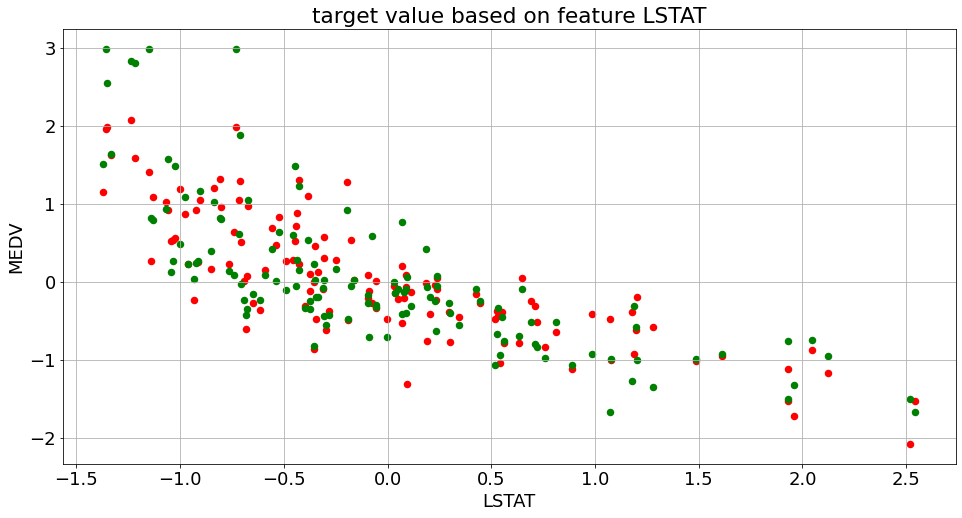

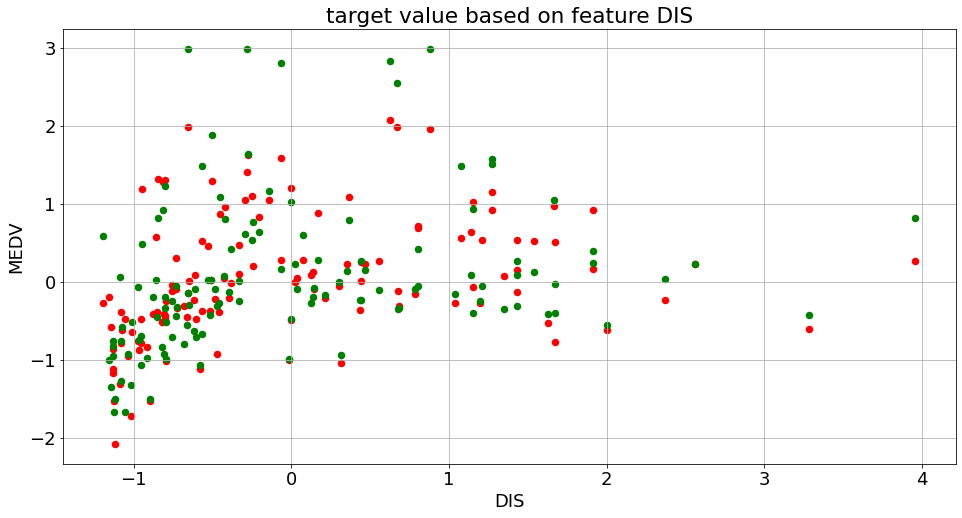

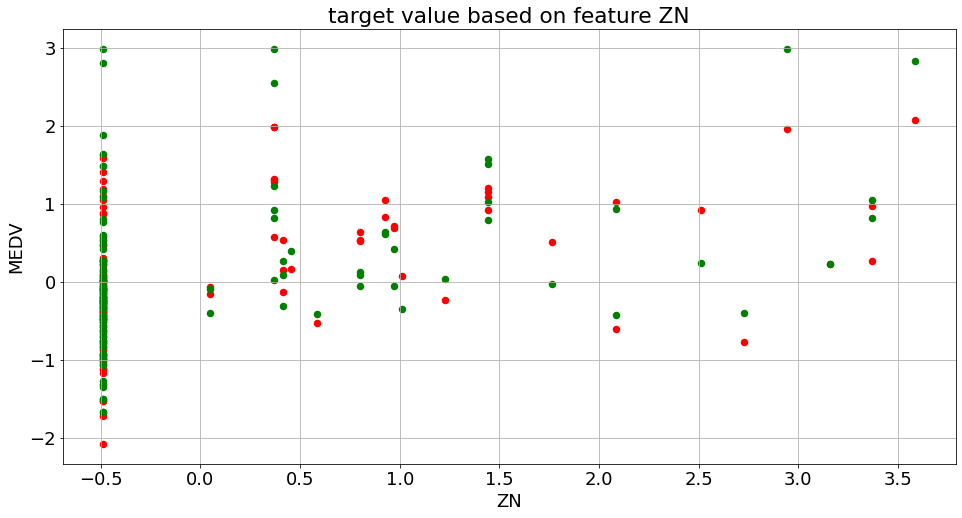

In [87]:
plt.figure
plt.scatter(X_test.LSTAT, y_pred, color='red', lw=1.5)
plt.scatter(X_test.LSTAT, y_test, color='green', lw=1.5)
plt.ylabel(data.columns[-1])
plt.xlabel('LSTAT')
plt.title(f'target value based on feature LSTAT')
plt.grid()
plt.show()

plt.figure
plt.scatter(X_test.DIS, y_pred, color='red', lw=1.5)
plt.scatter(X_test.DIS, y_test, color='green', lw=1.5)
plt.ylabel(data.columns[-1])
plt.xlabel('DIS')
plt.title(f'target value based on feature DIS')
plt.grid()
plt.show()

plt.figure
plt.scatter(X_test.ZN, y_pred, color='red', lw=1.5)
plt.scatter(X_test.ZN, y_test, color='green', lw=1.5)
plt.ylabel(data.columns[-1])
plt.xlabel('ZN')
plt.title(f'target value based on feature ZN')
plt.grid()
plt.show()

### plot weight norm in term of $\lambda$

multiply $\lambda$ by sample size to neutralize sample size on regression

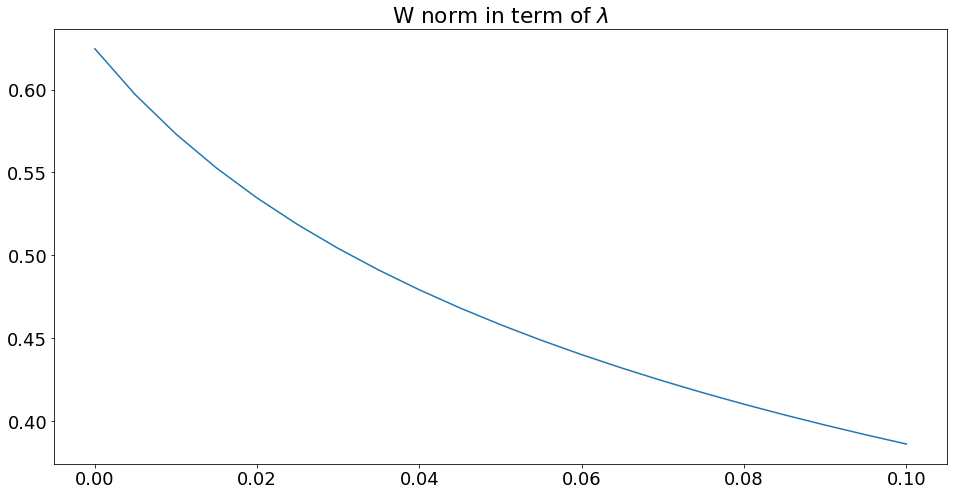

In [117]:
tempModel = LinearRegressionModel()
Ws = list()
for landa in np.arange(start=0, stop=0.105, step=0.005):
    w = tempModel.fit(X= X_train, y=y_train, regularization=y_train.shape[0]*landa)
    Ws.append(np.sum(np.square(w)))
plt.title("W norm in term of $\lambda$")
plt.plot(np.arange(start=0, stop=0.105, step=0.005), Ws)

### plot test error in term of $\lambda$

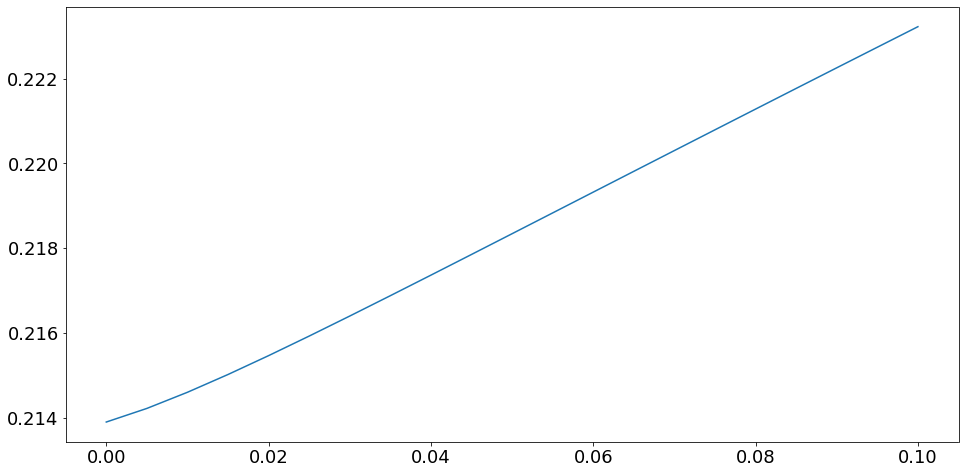

In [119]:
tempModel = LinearRegressionModel()
errors = list()
for landa in np.arange(start=0, stop=0.105, step=0.005):
    tempModel.fit(X= X_train, y=y_train, regularization=y_train.shape[0]*landa)
    errors.append(tempModel.evaluate(X_test, y_test))
plt.plot(np.arange(start=0, stop=0.105, step=0.005), errors)

### explain effect of regularization
regularization caused weight matrix with less norm and this always happen but in this case, it affected test error badly, because model is in underfitting region and regularization increase bias instead of lowering variance.

### add square of each feature to data set and repeat 4,5,6

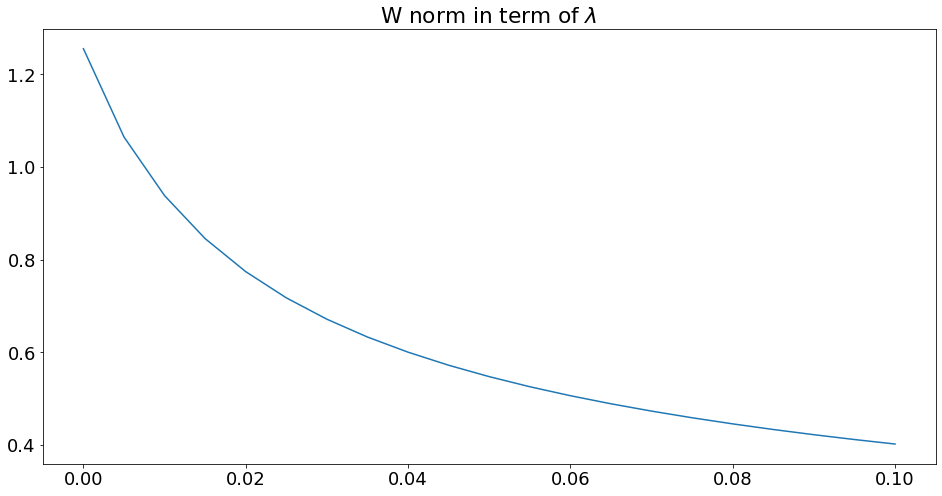

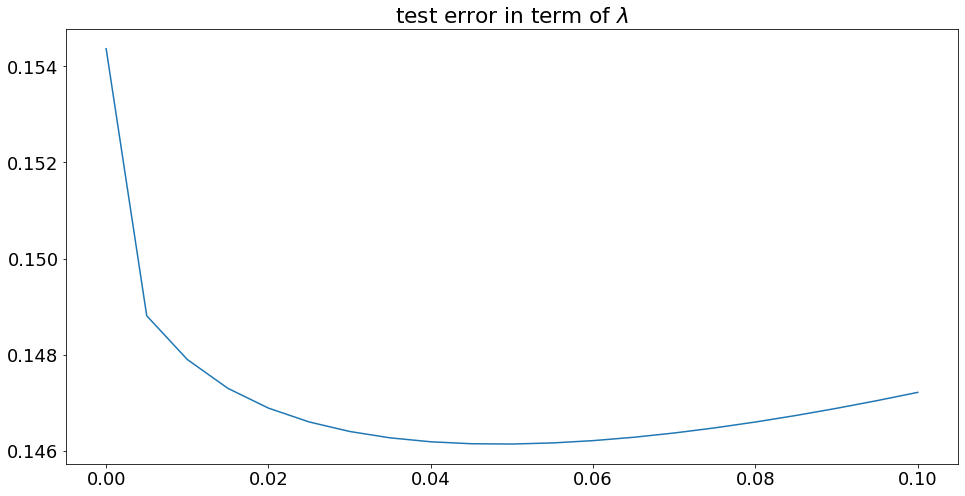

In [120]:
X2_train = np.concatenate((np.array(X_train),np.square(X_train)),axis = 1)
X2_test = np.concatenate((np.array(X_test), np.square(X_test)), axis=1)
tempModel.fit(X2_train, y_train, regularization=0)

plt.figure()
Ws = list()
errors = list()
for landa in np.arange(start=0, stop=0.105, step=0.005):
    w = tempModel.fit(X= X2_train, y=y_train, regularization=y_train.shape[0]*landa)
    Ws.append(np.sum(np.square(w)))
    errors.append(tempModel.evaluate(X2_test, y_test))
plt.title("W norm in term of $\lambda$")
plt.plot(np.arange(start=0, stop=0.105, step=0.005), Ws)

plt.figure()
plt.title('test error in term of $\lambda$')
plt.plot(np.arange(start=0, stop=0.105, step=0.005), errors)


### explain effect of regularization
in this part with making our model more complex, model is led to overfitting, so penalizing high norm of weight matrix and normalizing works well here.

### add square and power of three of each feature to data set

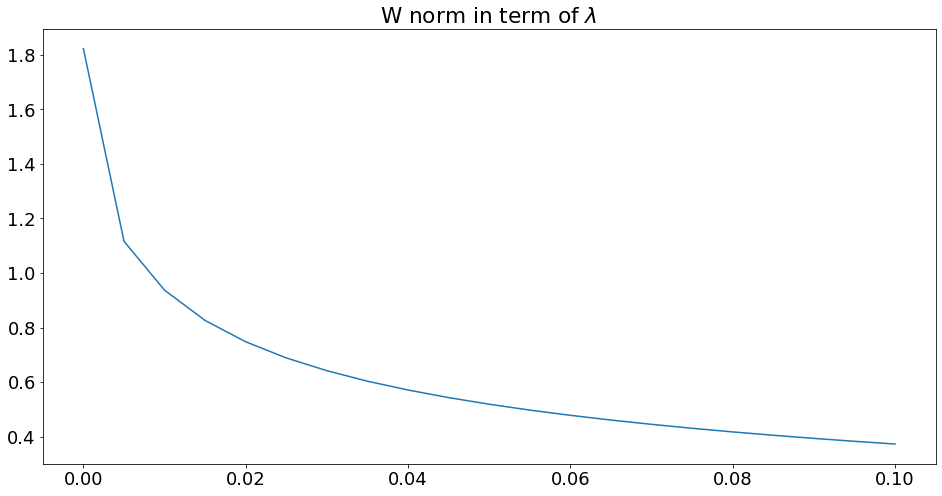

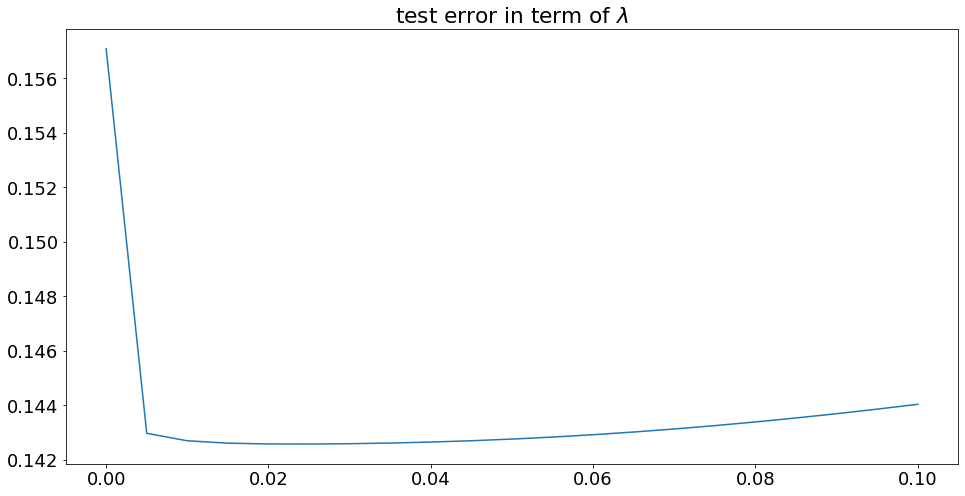

In [121]:
X3_train = np.concatenate((np.array(X_train),np.square(X_train), np.power(X_train, 3)),axis = 1)
X3_test = np.concatenate((np.array(X_test), np.square(X_test), np.power(X_test, 3)), axis=1)
tempModel.fit(X3_train, y_train, regularization=0)

plt.figure()
Ws = list()
errors = list()
for landa in np.arange(start=0, stop=0.105, step=0.005):
    w = tempModel.fit(X= X3_train, y=y_train, regularization=y_train.shape[0]*landa)
    Ws.append(np.sum(np.square(w)))
    errors.append(tempModel.evaluate(X3_test, y_test))
plt.title("W norm in term of $\lambda$")
plt.plot(np.arange(start=0, stop=0.105, step=0.005), Ws)

plt.figure()
plt.title('test error in term of $\lambda$')
plt.plot(np.arange(start=0, stop=0.105, step=0.005), errors)


#### explain effect of regularization
this part is more complex than order of 2, so as we can see it will overfit quickly if regularization factor isn't added.

### how 7 and 8 are helping model to do better work?
they save the model from underfitting, because behavior of features are more than 1st order and can't reach to good answer and always was in underfitting region with 1st order model.

# gradient descent with best learning rate

Minimize 
$$
\frac{1}{2} (Y-\phi W)^T(Y-\phi W) + \frac{1}{2} \lambda W^TW
$$
<li> 1-write down gradient descent update formulation </li>
<li> 2-use hessian matrix to obtain learning rate instead of manually set it. for better underestanding read about newton raphson method</li>
<li> 3-Plot the target value and the predicted value based on ‘LSTAT’, ‘DIS’, and any other
features so that you can see how the distributions vary</li>
<li> 4-plot regularization - weights_norm with lambda between 0 to 10 with step 0.1 </li>
<li> 5-plot regularization - test_error with lambda between 0 to 10 with step 0.1 </li>
<li> 6-explain effect of regularization </li>
<li> 7-add square of each feature to data set and repeat 4,5,6</li>
<li> 8-add square and power of three of each feature to data set and repeat 4,5,6</li>
<li> compare part $7^{th}$ test error and previous one <b>explain how 7 and 8 are helping model to do better work </li>
    

In [122]:
data,X,y = get_data_normalized()
X_train, X_test, y_train, y_test = split_data(X,y,0.25)

In [149]:
#this is just template you are free to implement is however you want.
class LinearRegressionModel:#phi is phi = lambda X : np.c_[np.ones(X.shape[0]),X] for adding bias term to data or 
    # any other features to data (this is just suggestion you are free to do whatever you want.)
    def __init__(self,learning_rate = 0.15):
        self.phi = lambda X : np.c_[np.ones((X.shape[0],1)),X]
        self.W = 0
        self.eta = learning_rate

    
    def fit(self,X,y,regularization,steps=10):
        """
        get X and y train and learn the parameter by the gradient descent.
    
        """
        phi = self.phi(X)
        self.W = np.zeros(phi.shape[1])
        sampleNumber = phi.shape[0]
        featureNumber = phi.shape[1]
        for i in range(steps):
            gradient = (-(y - phi@self.W).T @ phi + regularization*self.W) / sampleNumber
            self.W -= self.eta*gradient

        return self.W
    def evaluate(self,X,y):
        """
        get X and y and calculate error.
        """
        return np.sum(np.square(self.transform(X)-y))/np.size(y)
    def transform(self,X):
        """
        get X and calculate Phi(X)W as predicted values.
    
        """
        return np.array(self.phi(X)@self.W)
    
    def get_param(self):
        return self.W

In [157]:
model = LinearRegressionModel(learning_rate=0.25)
weights = model.fit(X_train, y_train, 0.1, steps=100)
y_pred = model.transform(X_test)
error = model.evaluate(X_test, y_test)
print("Error on test set: ", error)

Error on test set:  0.21566263689803028


### plot

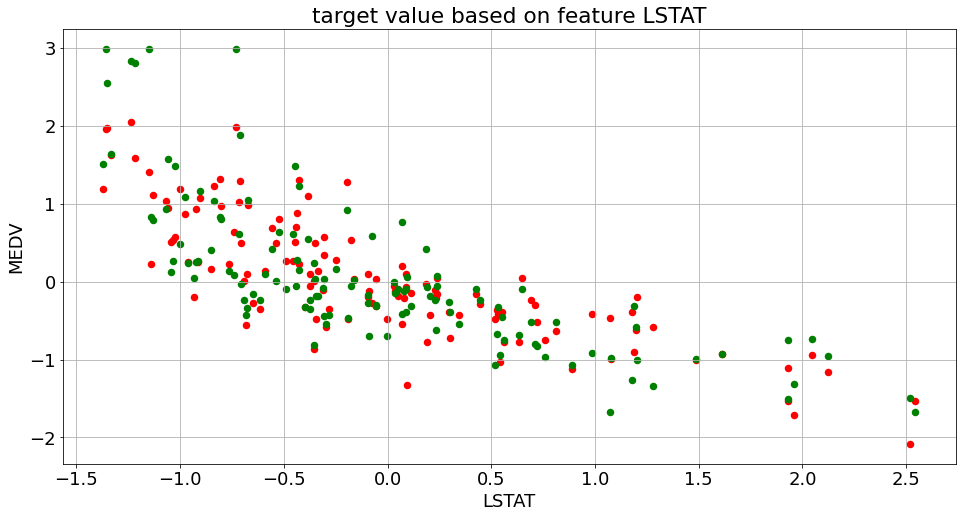

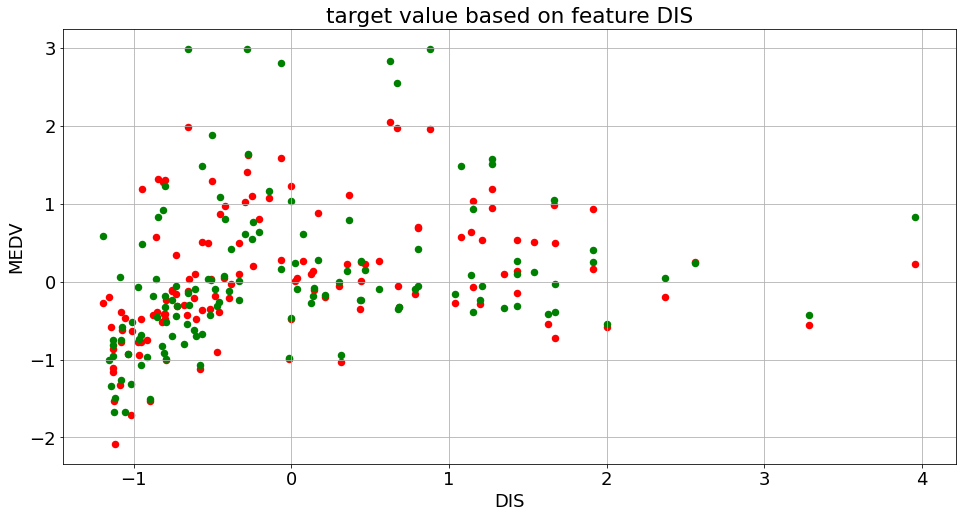

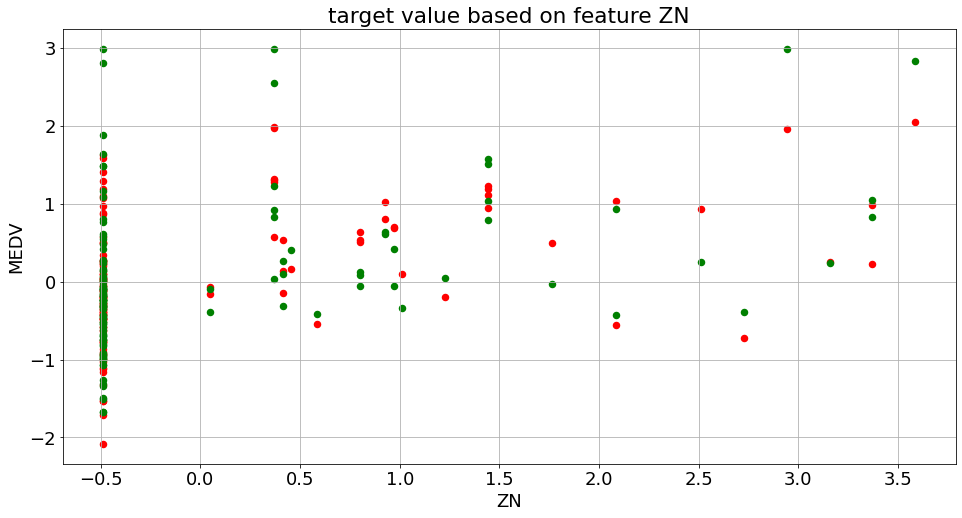

In [158]:
plt.figure
plt.scatter(X_test.LSTAT, y_pred, color='red', lw=1.5)
plt.scatter(X_test.LSTAT, y_test, color='green', lw=1.5)
plt.ylabel(data.columns[-1])
plt.xlabel('LSTAT')
plt.title(f'target value based on feature LSTAT')
plt.grid()
plt.show()

plt.figure
plt.scatter(X_test.DIS, y_pred, color='red', lw=1.5)
plt.scatter(X_test.DIS, y_test, color='green', lw=1.5)
plt.ylabel(data.columns[-1])
plt.xlabel('DIS')
plt.title(f'target value based on feature DIS')
plt.grid()
plt.show()

plt.figure
plt.scatter(X_test.ZN, y_pred, color='red', lw=1.5)
plt.scatter(X_test.ZN, y_test, color='green', lw=1.5)
plt.ylabel(data.columns[-1])
plt.xlabel('ZN')
plt.title(f'target value based on feature ZN')
plt.grid()
plt.show()

### plot weight norm in term of $\lambda$

multiply $\lambda$ by sample size to neutralize sample size on regression

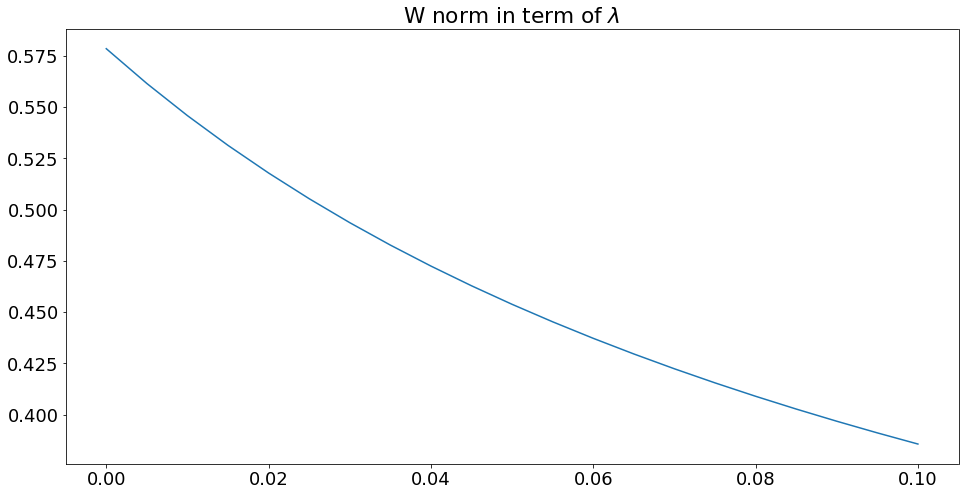

In [159]:
tempModel = LinearRegressionModel(learning_rate=0.25)
Ws = list()
for landa in np.arange(start=0, stop=0.105, step=0.005):
    w = tempModel.fit(X= X_train, y=y_train, regularization=y_train.shape[0]*landa, steps=100)
    Ws.append(np.sum(np.square(w)))
plt.title("W norm in term of $\lambda$")
plt.plot(np.arange(start=0, stop=0.105, step=0.005), Ws)

### plot test error in term of $\lambda$

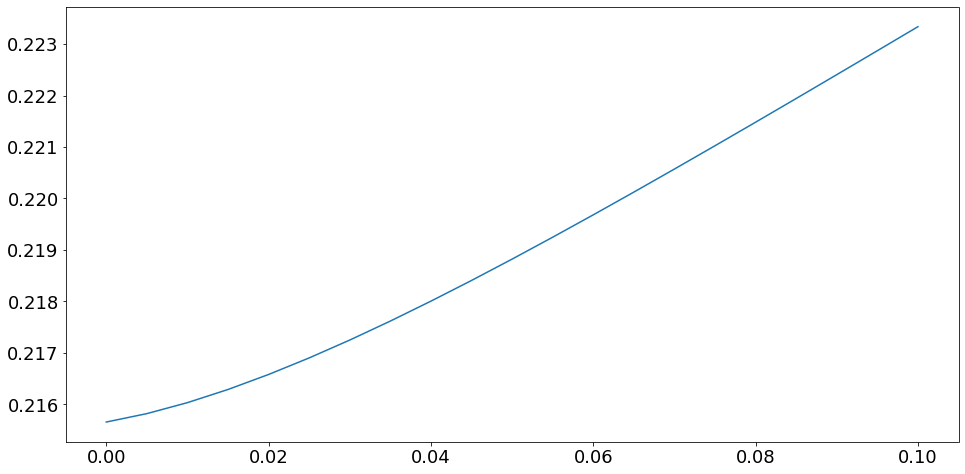

In [160]:
tempModel = LinearRegressionModel(learning_rate=0.25)
errors = list()
for landa in np.arange(start=0, stop=0.105, step=0.005):
    tempModel.fit(X= X_train, y=y_train, regularization=y_train.shape[0]*landa, steps=100)
    errors.append(tempModel.evaluate(X_test, y_test))
plt.plot(np.arange(start=0, stop=0.105, step=0.005), errors)

### explain effect of regularization
regularization caused weight matrix with less norm and this always happen but in this case, it affected test error badly, because model is in underfitting region and regularization increase bias instead of lowering variance.

### add square of each feature to data set and repeat 4,5,6

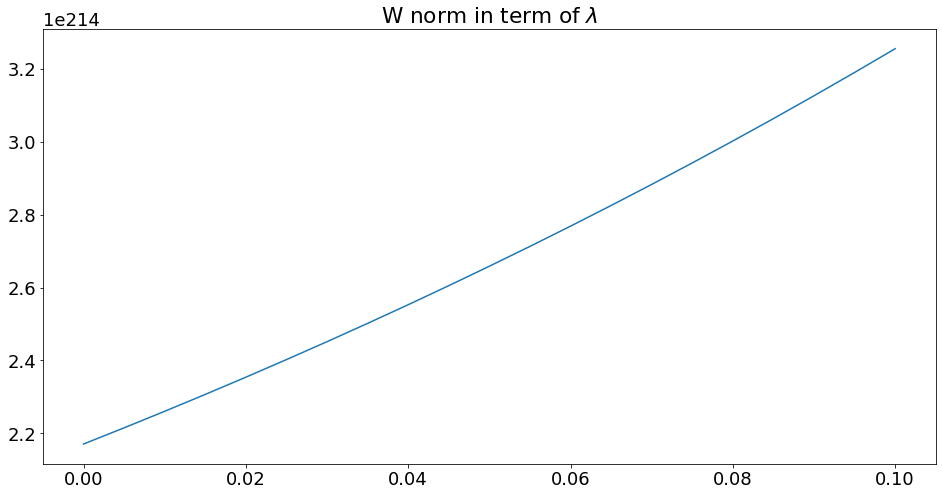

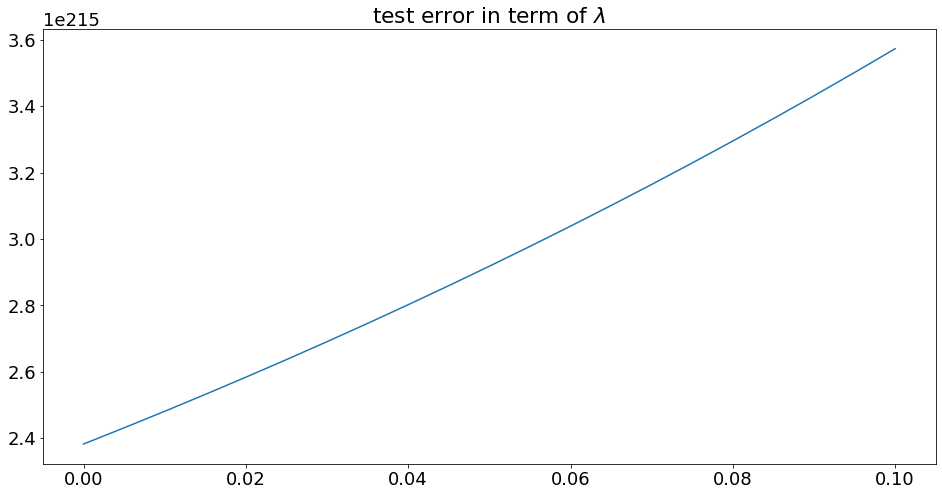

In [161]:
X2_train = np.concatenate((np.array(X_train),np.square(X_train)),axis = 1)
X2_test = np.concatenate((np.array(X_test), np.square(X_test)), axis=1)
tempModel.fit(X2_train, y_train, regularization=0, steps=100)

plt.figure()
Ws = list()
errors = list()
for landa in np.arange(start=0, stop=0.105, step=0.005):
    w = tempModel.fit(X= X2_train, y=y_train, regularization=y_train.shape[0]*landa, steps=100)
    Ws.append(np.sum(np.square(w)))
    errors.append(tempModel.evaluate(X2_test, y_test))
plt.title("W norm in term of $\lambda$")
plt.plot(np.arange(start=0, stop=0.105, step=0.005), Ws)

plt.figure()
plt.title('test error in term of $\lambda$')
plt.plot(np.arange(start=0, stop=0.105, step=0.005), errors)


### explain effect of regularization
in this part with making our model more complex, model is led to overfitting, so penalizing high norm of weight matrix and normalizing works well here.

### add square and power of three of each feature to data set

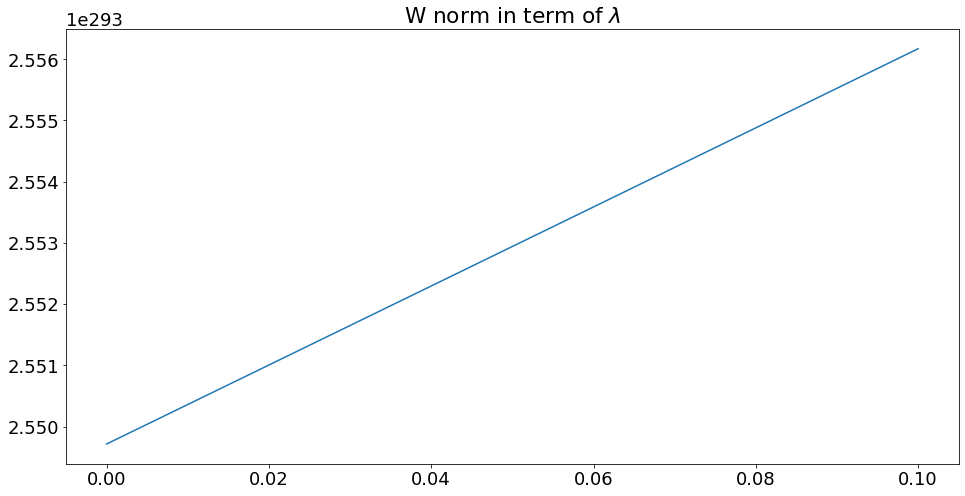

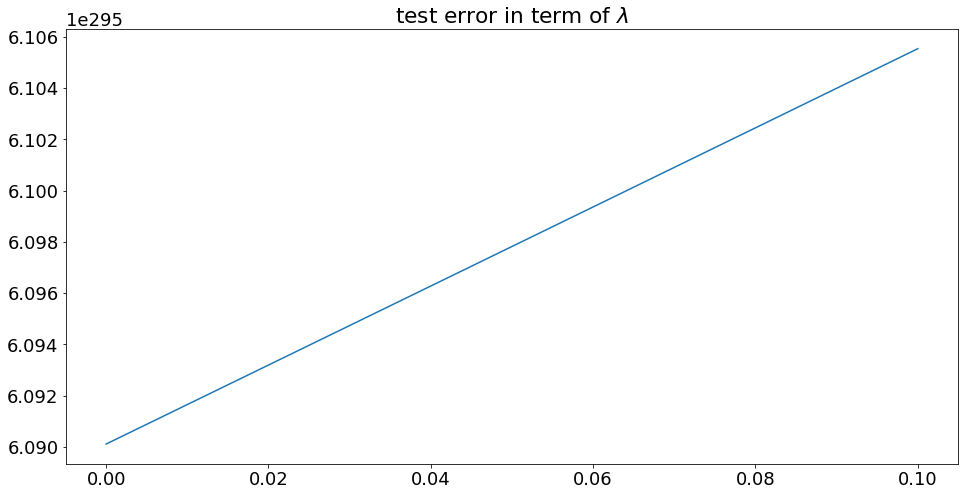

In [164]:
X3_train = np.concatenate((np.array(X_train),np.square(X_train), np.power(X_train, 3)),axis = 1)
X3_test = np.concatenate((np.array(X_test), np.square(X_test), np.power(X_test, 3)), axis=1)
tempModel.fit(X3_train, y_train, regularization=0, steps=100)

plt.figure()
Ws = list()
errors = list()
for landa in np.arange(start=0, stop=0.105, step=0.005):
    w = tempModel.fit(X= X3_train, y=y_train, regularization=y_train.shape[0]*landa, steps=50)
    Ws.append(np.sum(np.square(w)))
    errors.append(tempModel.evaluate(X3_test, y_test))
plt.title("W norm in term of $\lambda$")
plt.plot(np.arange(start=0, stop=0.105, step=0.005), Ws)

plt.figure()
plt.title('test error in term of $\lambda$')
plt.plot(np.arange(start=0, stop=0.105, step=0.005), errors)


#### explain effect of regularization
this part is more complex than order of 2, so as we can see it will overfit quickly if regularization factor isn't added.

### how 7 and 8 are helping model to do better work?
they save the model from underfitting, because behavior of features are more than 1st order and can't reach to good answer and always was in underfitting region with 1st order model.